# Convex optimization

Examples of cost functions and constraints

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def obj_fn(x):
    """Given a 2D vector x, return a quadratic function"""
    Q = np.matrix([[1, 0.5], [0.5, 2]])
    b = -np.matrix([5,3])
    c = 1
    x = np.matrix(x).T
    print(x.shape)
    y = np.diag(x.T @ Q @ x) + b @ x + c
    return np.array(y).flatten()

x = np.array([[2, 0, 1], [1, 0, 2]]).T
obj_fn(x)

(2, 3)


array([-4.,  1.,  1.])

In [3]:
def make_meshgrid(x=None, y=None, h=.01):
    """Create a mesh of points to plot in

    Parameters (all optional)
    -------------------------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid

    Returns
    -------
    xx, yy : ndarray
    """
    if (x is not None) and (y is not None):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min = -3
        x_max = 3
        y_min = -3
        y_max = 3
    step = (1j/h)
    xx, yy = np.mgrid[x_min:x_max:step, y_min:y_max:step]
    return xx, yy

def plot_contours(ax, func, xx, yy):
    """Plot the contour lines of a function.

    Parameters
    ----------
    ax: matplotlib axes object
    func: 2D function
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    """
    Z = func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.plasma)
    #ax.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '--', '--'], levels=[-1, 0, 1])
    ax.contour(xx, yy, Z, colors='k', linestyles = '--')


(2, 10000)


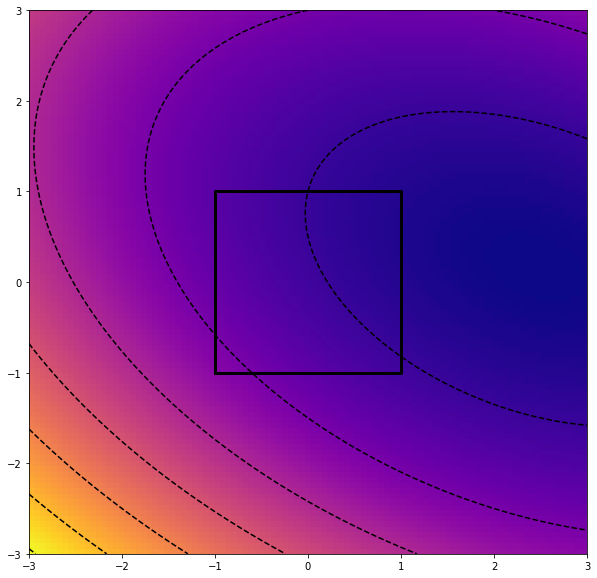

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
xx, yy = make_meshgrid()
plot_contours(ax, obj_fn, xx, yy)
ax.plot([-1, -1, 1, 1, -1], [-1, 1, 1, -1, -1], 'k-', linewidth=3)
plt.savefig('constrained-optimization.pdf')